# Prototype baseline model

# Import 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt 

In [34]:
df = pd.read_csv('../data/interim_data/clean_ds.csv') # for semplicity i use the clean data (not the normalized one)

In [35]:
df.head()

,aggregated1,aggregated2,granular1,granular2,granular3,granular4,granular5,id
0,8.00,9.00,8.00,8.00,9.00,8.00,8.00,1
1,6.67,8.33,6.00,7.67,7.00,7.00,6.67,2
2,5.33,4.33,6.33,4.00,6.33,4.33,6.67,3
3,7.67,8.33,7.67,8.33,6.67,7.67,8.67,4
4,7.00,8.33,7.67,8.00,9.00,7.67,8.33,5


# Model

Build model

In [36]:
import numpy as np

In [57]:
def meanModel_predict(X): # The * means "pack all positional arguments into the tuple X"
    """
    Given one or more lists/arrays of numbers, return their means.
    - If one list is given → return a single mean (float)
    - If multiple lists are given → return a list of means
    """
    means = np.array([[np.mean(x),np.mean(x)] for x in X])
    return means[0] if len(means) == 1 else means 

    

Define target and features 

In [58]:
target_cols = ['aggregated1', 'aggregated2']
feature_cols = ['granular1', 'granular2', 'granular3', 'granular4', 'granular5']

X = df[feature_cols].values
y = df[target_cols].values

Define train and split 

In [59]:
from sklearn.model_selection import train_test_split
seed = 0
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state=seed)

In [60]:
X_test

array([[5.  , 8.  , 6.  , 7.  , 7.33],
       [5.  , 7.33, 5.  , 7.  , 3.33],
       [5.  , 7.33, 6.33, 7.  , 7.  ],
       [7.67, 8.  , 9.  , 7.67, 8.33],
       [8.33, 8.  , 8.  , 8.  , 8.  ],
       [6.  , 8.  , 6.  , 7.  , 8.33],
       [7.  , 7.  , 6.33, 7.  , 6.67],
       [7.67, 8.  , 7.33, 8.33, 8.33],
       [4.  , 7.  , 6.33, 7.  , 6.33]])

Eval

In [61]:
y_pred = meanModel_predict(X_test) # *X_test unpacks the array into individual rows
y_pred

array([[6.666, 6.666],
       [5.532, 5.532],
       [6.532, 6.532],
       [8.134, 8.134],
       [8.066, 8.066],
       [7.066, 7.066],
       [6.8  , 6.8  ],
       [7.932, 7.932],
       [6.132, 6.132]])

In [62]:
y_pred[:,0]

array([6.666, 5.532, 6.532, 8.134, 8.066, 7.066, 6.8  , 7.932, 6.132])

In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

r2 = r2_score(y_true = y_test, y_pred = y_pred )
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred )
mape = mean_absolute_percentage_error(y_true = y_test, y_pred = y_pred )

r2_agg1 = r2_score(y_true = y_test[:,0], y_pred = y_pred[:,0])
mae_agg1 = mean_absolute_error(y_true = y_test[:,0], y_pred = y_pred[:,0])
mape_agg1 = mean_absolute_percentage_error(y_true = y_test[:,0], y_pred = y_pred[:,0])

r2_agg2 = r2_score(y_true = y_test[:,1], y_pred = y_pred[:,1])
mae_agg2 = mean_absolute_error(y_true = y_test[:,1], y_pred = y_pred[:,1])
mape_agg2 = mean_absolute_percentage_error(y_true = y_test[:,1], y_pred = y_pred[:,1])

print("---- Overall ----")
print(f"R2  : {r2:.4f}")
print(f"MAE : {mae:.4f}")
print(f"MAPE: {mape:.4f}")

print("\n---- Agg1 ----")
print(f"R2  : {r2_agg1:.4f}")
print(f"MAE : {mae_agg1:.4f}")
print(f"MAPE: {mape_agg1:.4f}")

print("\n---- Agg2 ----")
print(f"R2  : {r2_agg2:.4f}")
print(f"MAE : {mae_agg2:.4f}")
print(f"MAPE: {mape_agg2:.4f}")



---- Overall ----
R2  : 0.5577
MAE : 0.8100
MAPE: 0.1704

---- Agg1 ----
R2  : 0.3946
MAE : 1.0660
MAPE: 0.2294

---- Agg2 ----
R2  : 0.7208
MAE : 0.5540
MAPE: 0.1114


Plot 

In [65]:
import os, json, datetime 

In [67]:
# build exp folder
timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
exp_name = f"exp_seed{seed}"
exp_dir = f"../report/experiment_plots/modelMean_{timestamp}_{exp_name}"
os.makedirs(exp_dir, exist_ok=True)

# def config 
config = {
    "model": "MeanModel",
    "seed": seed,
    "test_size": test_size
}

with open(f"{exp_dir}/config.json",'w') as f:
    json.dump(config, f, indent=4)

# Metriche 

metrics = {
    "overall": {"r2": r2, "mae": mae, "mape": mape},
    "agg1": {"r2": r2_agg1, "mae": mae_agg1, "mape": mape_agg1},
    "agg2": {"r2": r2_agg2, "mae": mae_agg2, "mape": mape_agg2},
}

with open(f"{exp_dir}/metrics.json", "w") as f:
    json.dump(metrics, f, indent = 4)


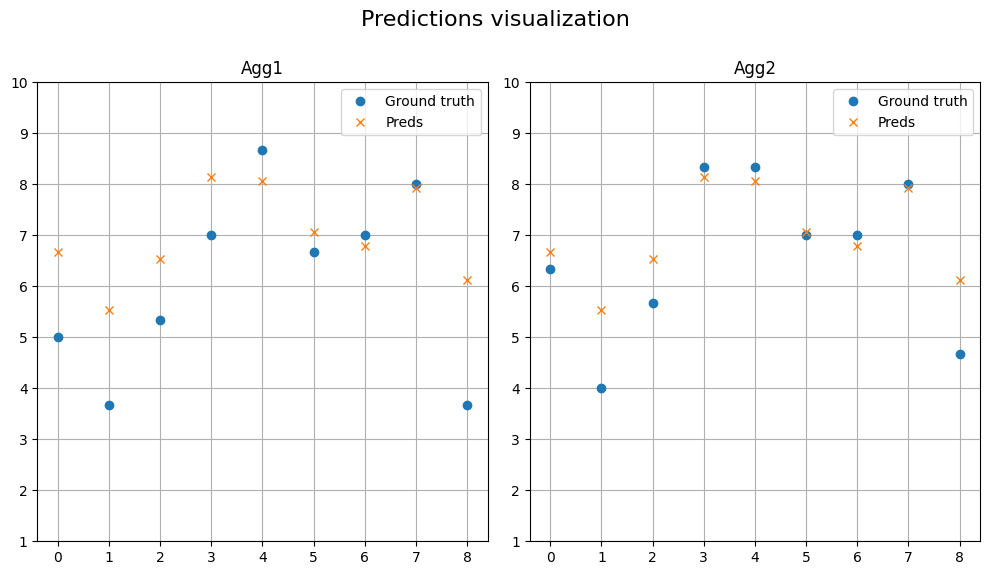

In [68]:
plt.figure(figsize=(10,6))

# Titolo generale
plt.suptitle("Predictions visualization", fontsize=16, y=0.95)

plt.subplot(1,2,1)
plt.title("Agg1")
plt.plot(y_test[:,0], marker='o', linestyle='None', label='Ground truth')
plt.plot(y_pred[:,0], marker='x', linestyle='None', label='Preds')
plt.ylim(1,10)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Agg2")
plt.plot(y_test[:,1], marker='o', linestyle='None', label='Ground truth')
plt.plot(y_pred[:,1], marker='x', linestyle='None', label='Preds')
plt.ylim(1,10)
plt.legend()
plt.grid(True)

plt.savefig(f"{exp_dir}/se_preds.png", dpi=150)

# Migliora il layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
